In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset=pd.read_csv('29-bestsellers_with_categories.csv')

In [116]:
missing_data=dataset.isnull().sum()
print("missing data:\n",missing_data)

missing data:
 Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64


In [117]:
duplicate_rows = dataset.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

Number of duplicate rows: 0


In [118]:
num_unique_authors = dataset['Author'].nunique()
print("Number of unique Author values:", num_unique_authors)

Number of unique Author values: 248


In [119]:
num_unique_names = dataset['Name'].nunique()
print("Number of unique Name values:", num_unique_names)

Number of unique Name values: 351


In [136]:
print("Dataset dimensions (rows, columns):", dataset.shape)

Dataset dimensions (rows, columns): (550, 7)


In [137]:
unique_counts = dataset.nunique()
print("Number of unique values in each column:\n", unique_counts)

Number of unique values in each column:
 Name           351
Author         248
User Rating     14
Reviews        346
Price           40
Year            11
Genre            2
dtype: int64


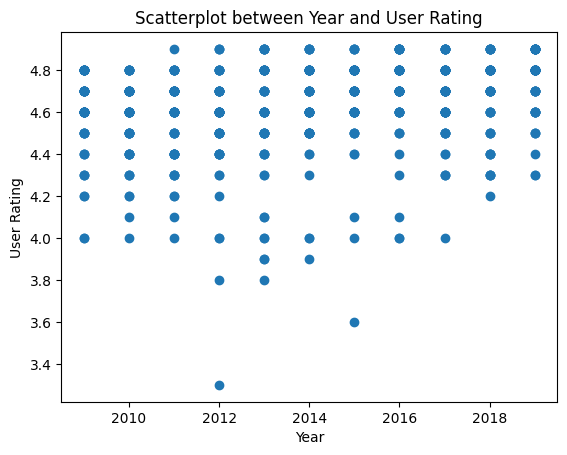

In [121]:
plt.scatter(dataset['Year'], dataset['User Rating'])
plt.xlabel('Year')
plt.ylabel('User Rating')
plt.title('Scatterplot between Year and User Rating')
plt.show()

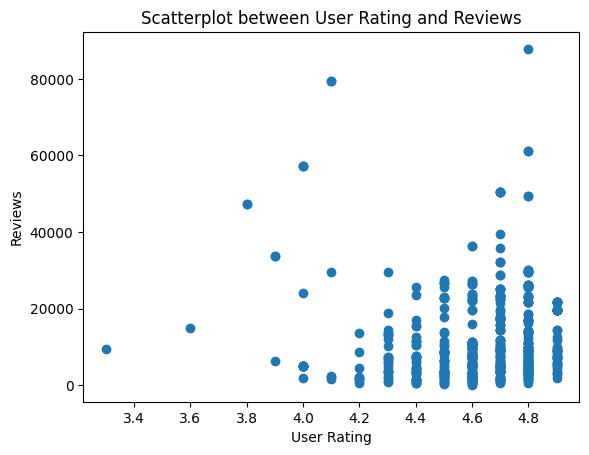

In [122]:
plt.scatter(dataset['User Rating'], dataset['Reviews'])
plt.xlabel('User Rating')
plt.ylabel('Reviews')
plt.title('Scatterplot between User Rating and Reviews')
plt.show()

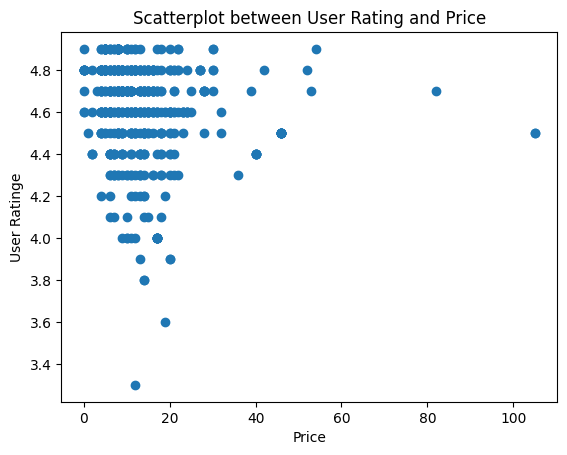

In [123]:
plt.scatter(dataset['Price'], dataset['User Rating'])
plt.xlabel('Price')
plt.ylabel('User Ratinge')
plt.title('Scatterplot between User Rating and Price')
plt.show()

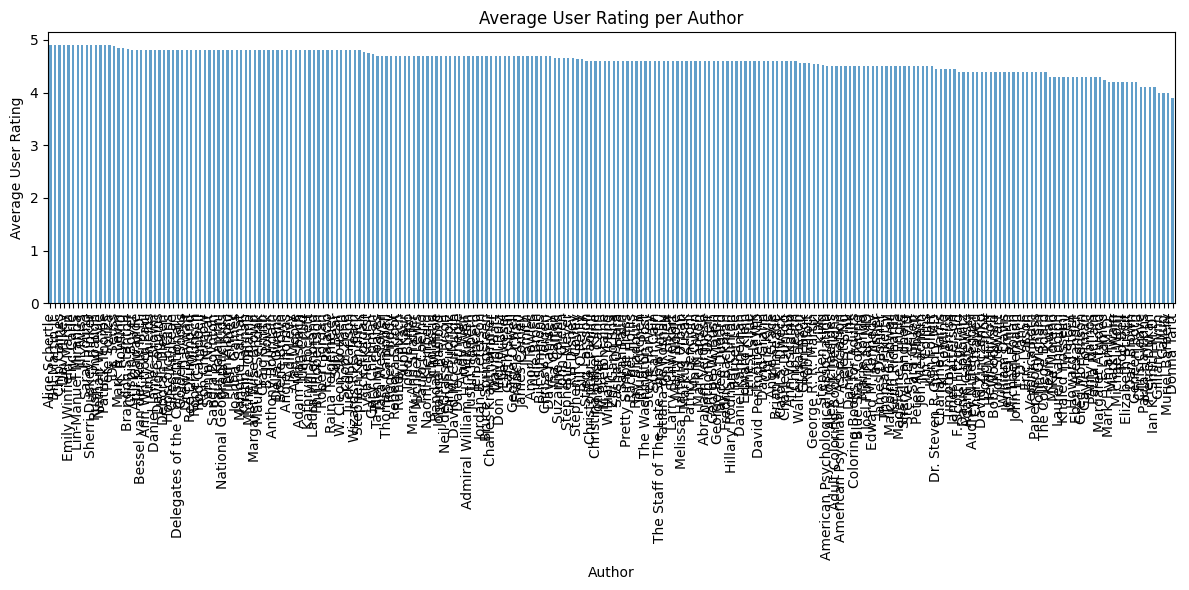

In [124]:
# Calculate average user rating per author
author_ratings = dataset.groupby('Author')['User Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
author_ratings.plot(kind='bar', alpha=0.7)
plt.xlabel('Author')
plt.ylabel('Average User Rating')
plt.title('Average User Rating per Author')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

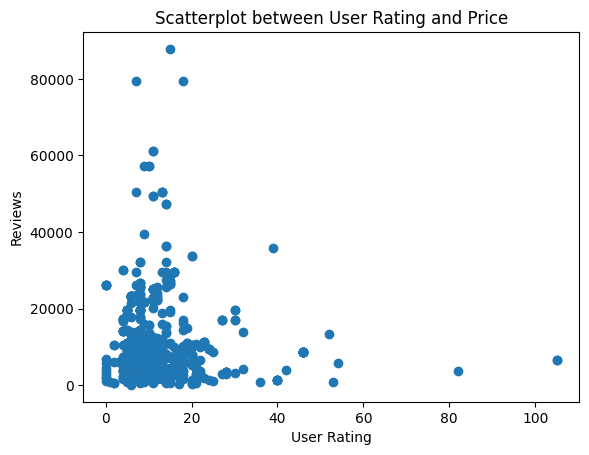

In [125]:
plt.scatter(dataset['Price'], dataset['Reviews'])
plt.xlabel('User Rating')
plt.ylabel('Reviews')
plt.title('Scatterplot between User Rating and Price')
plt.show()

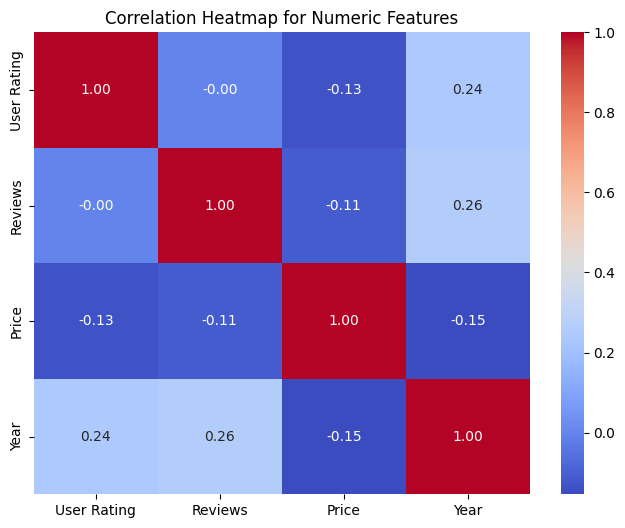

In [126]:
import seaborn as sns

# Compute the correlation matrix
corr = dataset.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Numeric Features')
plt.show()

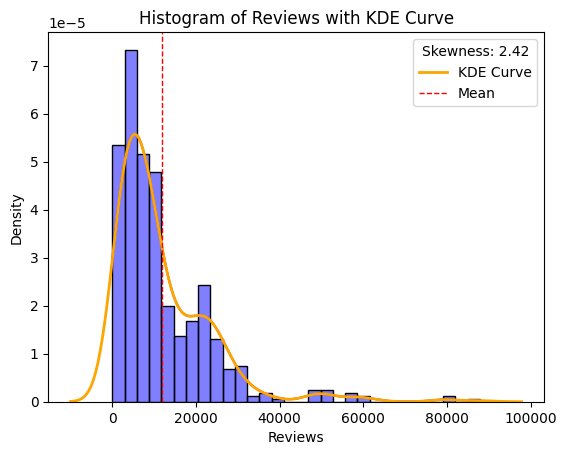

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(dataset['Reviews'], bins=30, kde=True, edgecolor='black', stat="density", color='blue')
sns.kdeplot(dataset['Reviews'], color='orange', linewidth=2, label='KDE Curve')

plt.xlabel('Reviews')
plt.ylabel('Density')
plt.title('Histogram of Reviews with KDE Curve')
skewness = dataset['Reviews'].skew()
plt.axvline(dataset['Reviews'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.legend(title=f'Skewness: {skewness:.2f}')
plt.show()

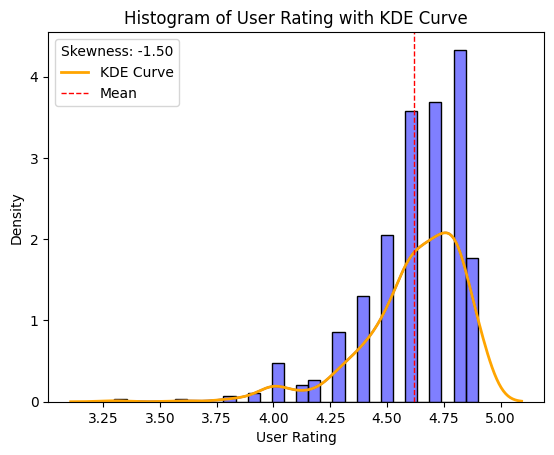

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(dataset['User Rating'], bins=30, kde=True, edgecolor='black', stat="density", color='blue')
sns.kdeplot(dataset['User Rating'], color='orange', linewidth=2, label='KDE Curve')

plt.xlabel('User Rating')
plt.ylabel('Density')
plt.title('Histogram of User Rating with KDE Curve')
skewness = dataset['User Rating'].skew()
plt.axvline(dataset['User Rating'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.legend(title=f'Skewness: {skewness:.2f}')
plt.show()

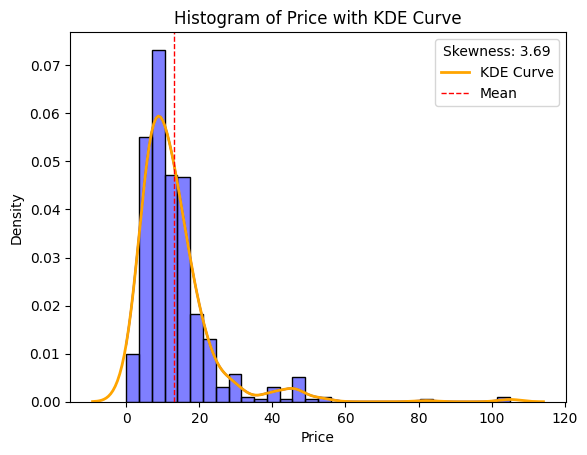

In [129]:
sns.histplot(dataset['Price'], bins=30, kde=True, edgecolor='black', stat="density", color='blue')
sns.kdeplot(dataset['Price'], color='orange', linewidth=2, label='KDE Curve')

plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Histogram of Price with KDE Curve')
skewness = dataset['Price'].skew()
plt.axvline(dataset['Price'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.legend(title=f'Skewness: {skewness:.2f}')
plt.show()


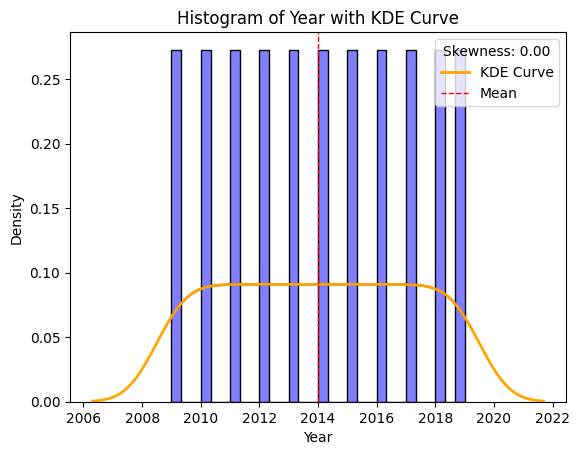

In [130]:
sns.histplot(dataset['Year'], bins=30, kde=True, edgecolor='black', stat="density", color='blue')
sns.kdeplot(dataset['Year'], color='orange', linewidth=2, label='KDE Curve')

plt.xlabel('Year')
plt.ylabel('Density')
plt.title('Histogram of Year with KDE Curve')
skewness = dataset['Year'].skew()
plt.axvline(dataset['Year'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.legend(title=f'Skewness: {skewness:.2f}')
plt.show()


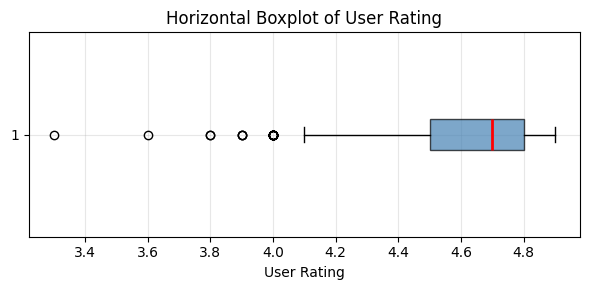

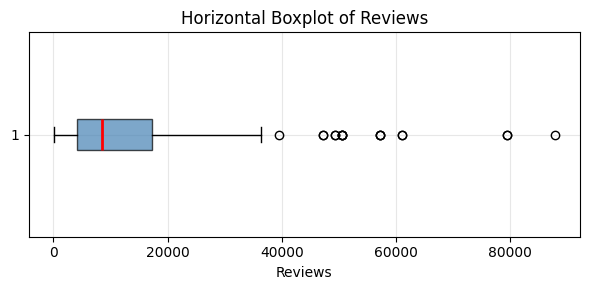

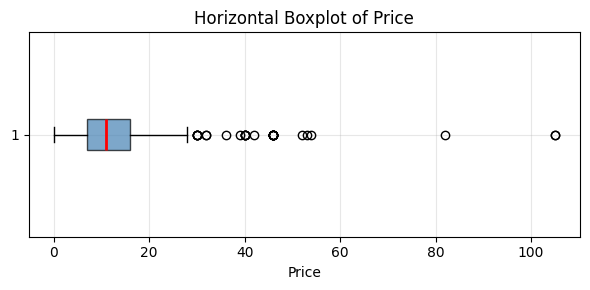

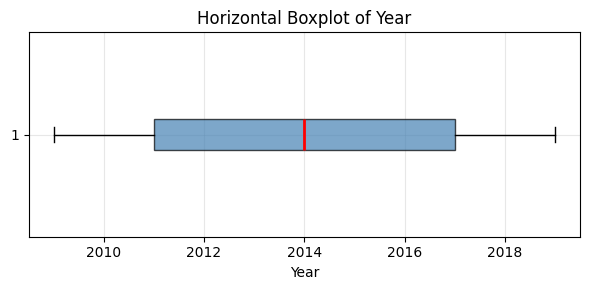

In [131]:
# Create horizontal boxplots for each numeric variable separately
import matplotlib.pyplot as plt
import seaborn as sns

# Get numeric columns
numeric_columns = dataset.select_dtypes(include=[np.number]).columns

for column in numeric_columns:
    plt.figure(figsize=(6, 3))
    plt.boxplot(dataset[column], vert=False, patch_artist=True,
                boxprops=dict(facecolor='steelblue', alpha=0.7),
                medianprops=dict(color='red', linewidth=2),
                whiskerprops=dict(color='black'),
                capprops=dict(color='black'))
    plt.xlabel(column)
    plt.title(f'Horizontal Boxplot of {column}')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    

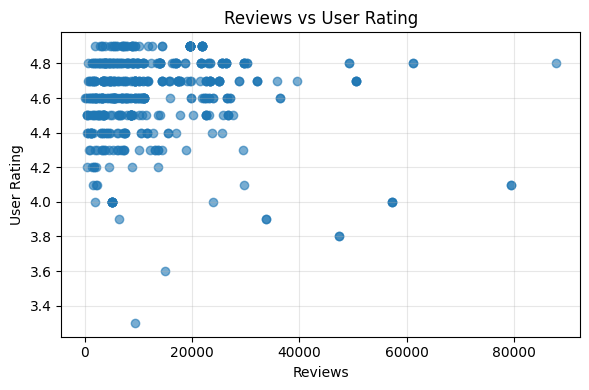

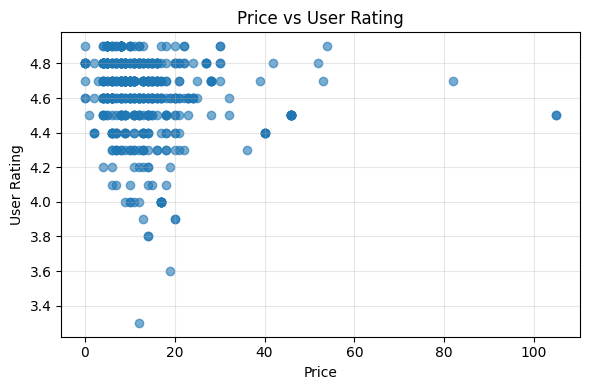

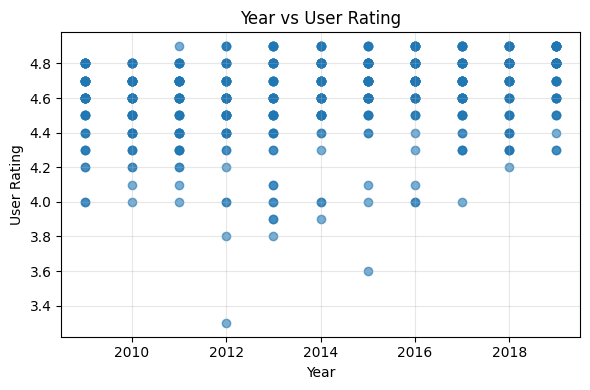

In [140]:
# Generate scatterplots for each numeric column vs User Rating
for col in numeric_columns:
    if col != 'User Rating':
        plt.figure(figsize=(6, 4))
        plt.scatter(dataset[col], dataset['User Rating'], alpha=0.6)
        plt.xlabel(col)
        plt.ylabel('User Rating')
        plt.title(f'{col} vs User Rating')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

In [133]:
import warnings
warnings.filterwarnings("ignore", message="Glyph.*missing")

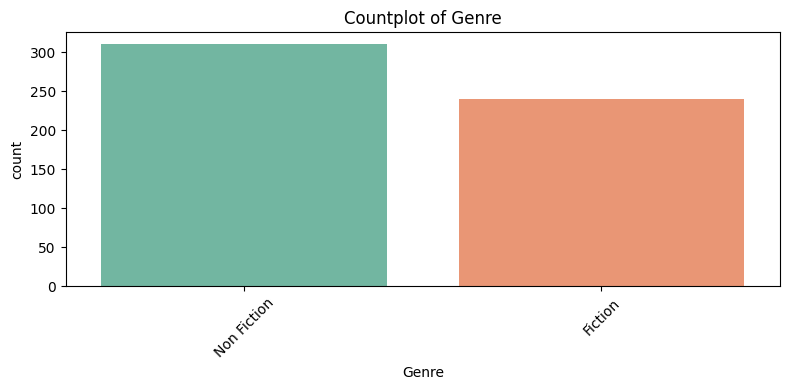

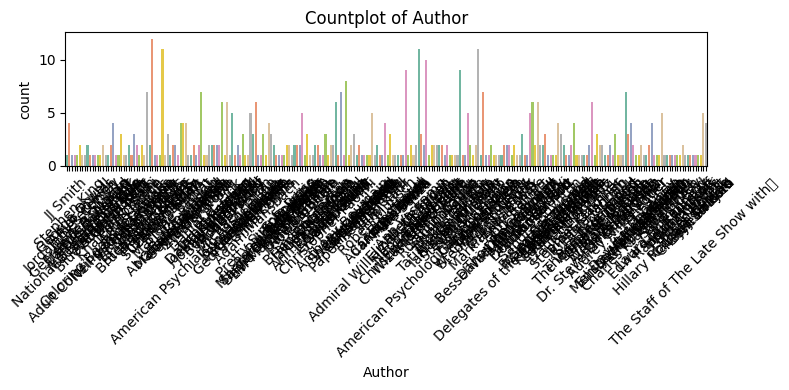

C:\Users\UTCHASH\AppData\Local\Temp\ipykernel_29252\1716932779.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


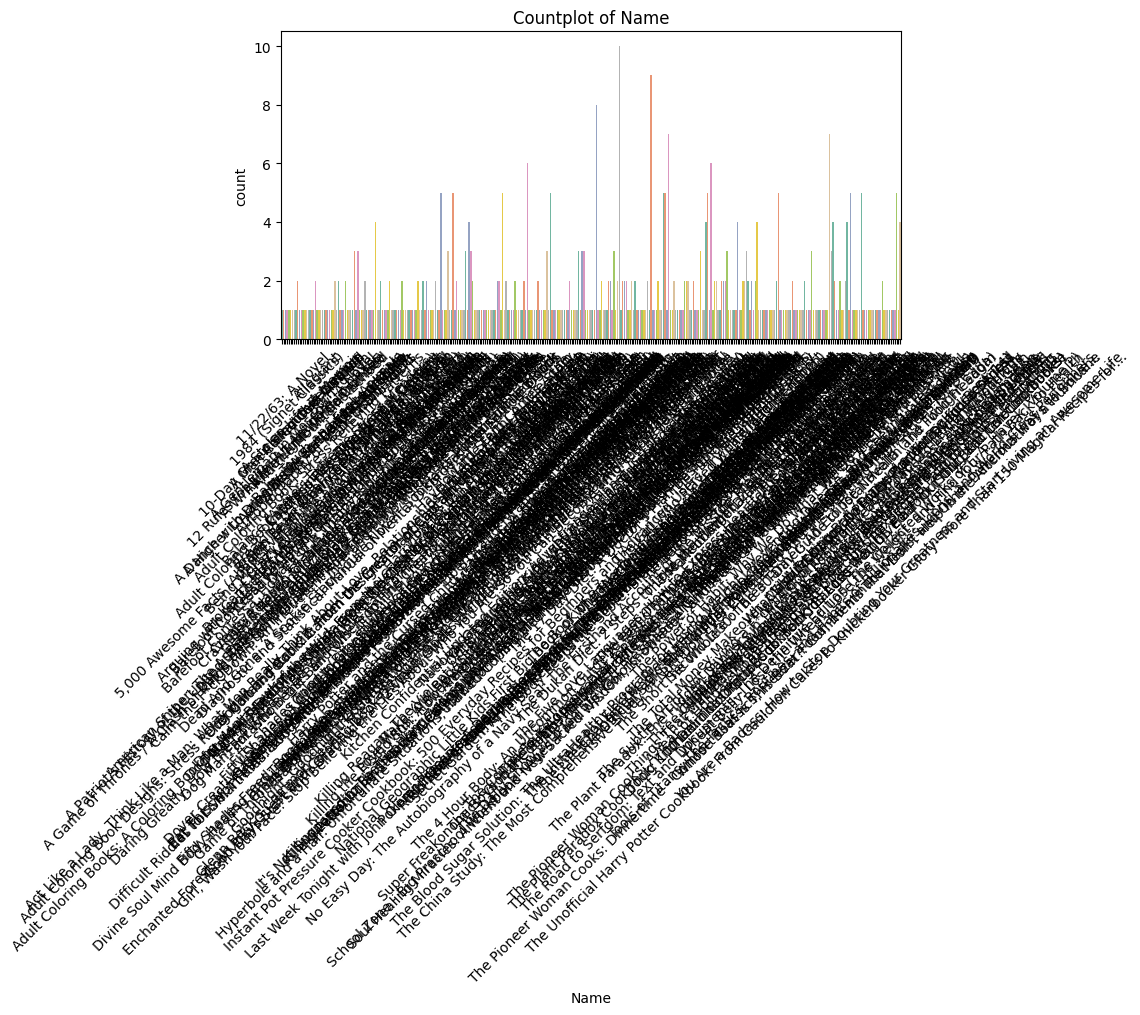

In [134]:
for col in ['Genre', 'Author', 'Name']:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=dataset, x=col, hue=col, palette='Set2', legend=False)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


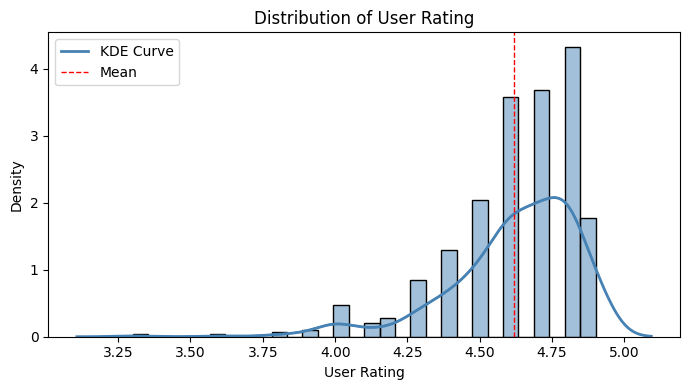

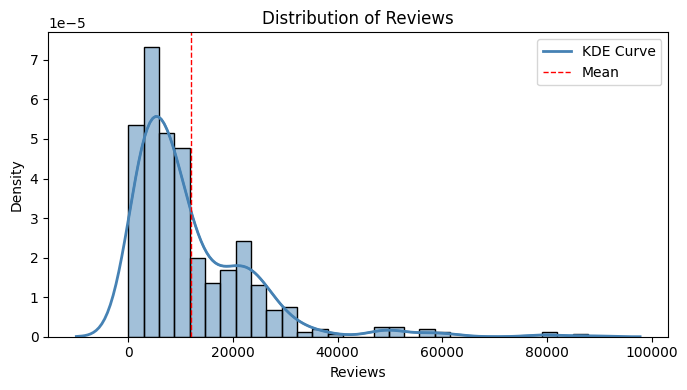

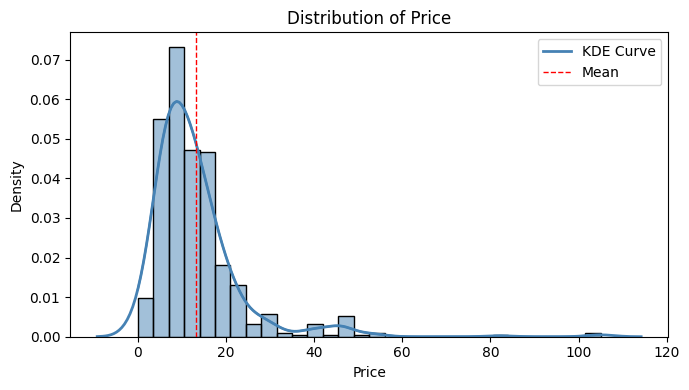

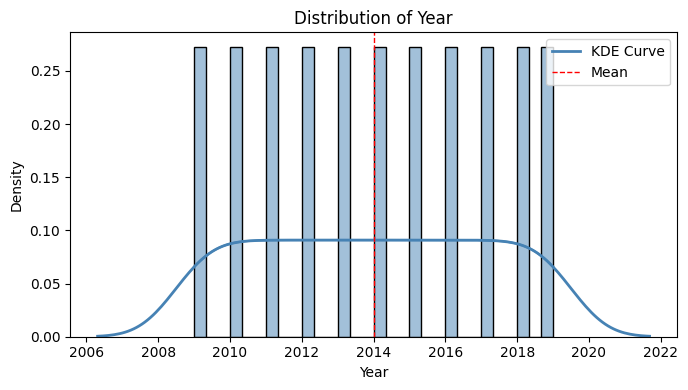

In [135]:
for col in numeric_columns:
    plt.figure(figsize=(7, 4))
    # Histogram with KDE curve, both in steelblue
    sns.histplot(dataset[col], bins=30, kde=True, edgecolor='black', stat="density", color='steelblue')
    sns.kdeplot(dataset[col], color='steelblue', linewidth=2, label='KDE Curve')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(f'Distribution of {col}')
    plt.axvline(dataset[col].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
plt.figure(figsize=(6, 3))
plt.boxplot(dataset['Reviews'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='steelblue', alpha=0.7),
            medianprops=dict(color='red', linewidth=2),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'))
plt.xlabel('Reviews')
plt.title('Horizontal Boxplot of Reviews')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

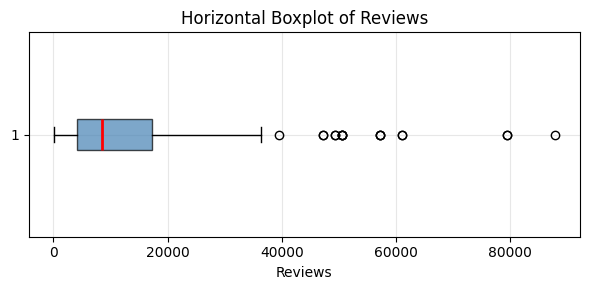

In [141]:
plt.figure(figsize=(6, 3))
plt.boxplot(dataset['Reviews'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='steelblue', alpha=0.7),
            medianprops=dict(color='red', linewidth=2),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'))
plt.xlabel('Reviews')
plt.title('Horizontal Boxplot of Reviews')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()